In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import norm, skew
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/datasets')

Drive already mounted at /content/datasets; to attempt to forcibly remount, call drive.mount("/content/datasets", force_remount=True).


In [ ]:
X = pd.read_csv('/content/datasets/MyDrive/Datasets/INM-CM4-8 Data for Model Creation/Predictors/All Combined/INMCM4-8_historical_predictors_Point_1.csv')


GCM

In [ ]:
y = pd.read_csv('/content/datasets/MyDrive/Datasets/INM-CM4-8 Data for Model Creation/Predictors/pr/INMCM4-8_historical_prPoint_1.csv')

In [ ]:
y = y.head(23725)

In [ ]:
X = X.head(23725)

In [ ]:
yt = y.tail(1825)
Xt = X.tail(1825)

In [ ]:
Xt.reset_index(inplace = True, drop = True)
yt.reset_index(inplace = True, drop = True)

In [ ]:
yt

,bnds,time,pr,lon,lat
0,0,2010-01-01 12:00:00,1.608282e-05,81.75,16.5
1,0,2010-01-02 12:00:00,4.876888e-05,81.75,16.5
2,0,2010-01-03 12:00:00,5.322513e-05,81.75,16.5
3,0,2010-01-04 12:00:00,7.419592e-05,81.75,16.5
4,0,2010-01-05 12:00:00,6.479450e-05,81.75,16.5
...,...,...,...,...,...
1820,0,2014-12-27 12:00:00,6.052207e-07,81.75,16.5
1821,0,2014-12-28 12:00:00,2.125865e-06,81.75,16.5
1822,0,2014-12-29 12:00:00,1.470041e-05,81.75,16.5
1823,0,2014-12-30 12:00:00,7.203627e-05,81.75,16.5


In [ ]:
X

,Unnamed: 0,huss,psl,tas,uas,vas,lon,lat,time
0,0,0.012381,101068.536296,297.404644,-2.123575,-0.107413,81.75,17.0,1950-01-01 12:00:00
1,1,0.013280,101145.763509,297.270966,-3.350186,-0.024253,81.75,17.0,1950-01-02 12:00:00
2,2,0.013705,101146.631185,298.022601,-2.959735,0.781811,81.75,17.0,1950-01-03 12:00:00
3,3,0.014431,101069.650391,297.847212,-1.889608,1.897249,81.75,17.0,1950-01-04 12:00:00
4,4,0.015225,101146.719727,297.957518,-0.930503,1.695759,81.75,17.0,1950-01-05 12:00:00
...,...,...,...,...,...,...,...,...,...
23720,23720,0.010824,100874.525065,294.895886,-0.801686,-2.816590,81.75,17.0,2014-12-27 12:00:00
23721,23721,0.012172,101156.384277,295.875663,-2.525290,-0.496604,81.75,17.0,2014-12-28 12:00:00
23722,23722,0.014495,101144.322917,297.260679,-2.410954,-0.359690,81.75,17.0,2014-12-29 12:00:00
23723,23723,0.016609,101058.521810,297.348623,-2.804721,-0.046820,81.75,17.0,2014-12-30 12:00:00


In [ ]:
y

,bnds,time,pr,lon,lat
0,0,1950-01-01 12:00:00,3.618718e-08,81.75,17.0
1,0,1950-01-02 12:00:00,4.147676e-09,81.75,17.0
2,0,1950-01-03 12:00:00,1.395377e-06,81.75,17.0
3,0,1950-01-04 12:00:00,1.421323e-05,81.75,17.0
4,0,1950-01-05 12:00:00,1.569507e-05,81.75,17.0
...,...,...,...,...,...
23720,0,2014-12-27 12:00:00,1.008701e-06,81.75,17.0
23721,0,2014-12-28 12:00:00,7.209615e-07,81.75,17.0
23722,0,2014-12-29 12:00:00,1.890282e-05,81.75,17.0
23723,0,2014-12-30 12:00:00,6.491132e-05,81.75,17.0


In [ ]:
X = X.loc[:, 'huss':'vas']
Xt = Xt.loc[:, 'huss':'vas']

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
Xt = StandardScaler().fit_transform(Xt)

In [ ]:
X

array([[-1.07112641,  0.83790507, -0.39673989, -1.18377048, -0.96487368],
       [-0.73774667,  1.03968469, -0.47913089, -1.7549108 , -1.02965533],
       [-0.62625682,  1.05944134, -0.31163429, -1.53696677, -0.60718844],
       ...,
       [-0.44940448,  1.01926316, -0.57185187, -1.25049189, -1.11583707],
       [ 0.12937699,  0.81496299, -0.4955298 , -1.4302162 , -0.98202568],
       [ 0.2285659 ,  0.81116344, -0.48826048, -1.71742922, -0.58750523]])

In [ ]:
y = y.loc[:, 'pr']
yt = yt.loc[:, 'pr']

In [ ]:
yt

0       1.608282e-05
1       4.876888e-05
2       5.322513e-05
3       7.419592e-05
4       6.479450e-05
            ...     
1820    6.052207e-07
1821    2.125865e-06
1822    1.470041e-05
1823    7.203627e-05
1824    1.291530e-04
Name: pr, Length: 1825, dtype: float64

In [ ]:
np.any(np.isnan(y))

False

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  4.522709806204632


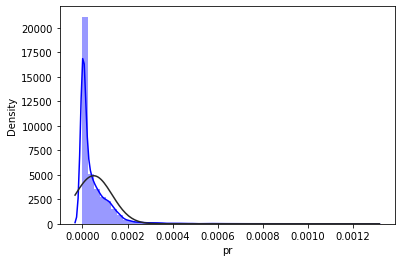

In [ ]:
sns.distplot(y, fit = norm, kde = True, color = 'blue')
plt.plot()
print('The skew of this distribution is = ', skew(y))

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions = np.where(predictions<=0, 0, predictions)
predictions = predictions

In [ ]:
print('Point6: ')
print(f'The Root Mean Square error is: {np.sqrt(mean_squared_error(y_test, predictions))}')
print(f'The Mean Absolute error is: {mean_absolute_error(y_test, predictions)}')
print(f'The R2 Score is: {r2_score(y_test, predictions)}')

Point6: 
The Root Mean Square error is: 6.553319699141803e-05
The Mean Absolute error is: 3.309475157534645e-05
The R2 Score is: 0.4321295606347135


In [ ]:
forecast = model.predict(Xt)
forecast = pd.DataFrame(forecast)
forecast = forecast.set_index(yt.index)

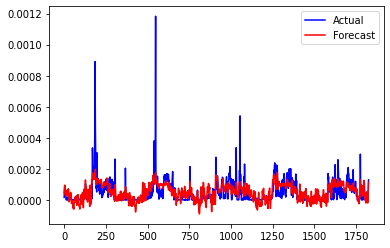

In [ ]:
# fig, ax = plt.subplots()
plt.plot(yt ,'b', label='Actual')
plt.plot(forecast, 'r', label='Forecast')
# ax.axis('equal')
leg = plt.legend();

In [ ]:
data = [0.4322, 0.4092, 0.4435, 0.4234, 0.4381, 0.4467]

Text(0.5, 0, 'INM-CM4-8')

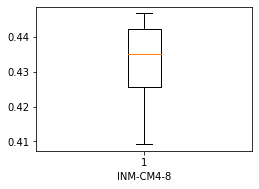

In [ ]:
fig = plt.figure(figsize =(3,2))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_xlabel('INM-CM4-8')